In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2022-01-20"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2022_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-01-20   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     ÎÇ®Íµ¨   8175     ÎÇ®Íµ¨   
1   2022-01-20     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6141     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2022-01-20     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   9069     ÎÇ®Íµ¨  14200     ÎÇ®Íµ¨   
3   2022-01-20    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5465     ÎÇ®Íµ¨   5478     ÎÇ®Íµ¨   
4   2022-01-20     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3980     ÎÇ®Íµ¨   4000     ÎÇ®Íµ¨   
5   2022-01-20    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6990     ÎÇ®Íµ¨   9975     ÎÇ®Íµ¨   
6   2022-01-20     ÎåÄÌåå                      1.0„éè   2920     ÎÇ®Íµ¨   3691     ÎÇ®Íµ¨   
7   2022-01-20   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950     ÎÇ®Íµ¨  15900     ÎÇ®Íµ¨   
8   2022-01-20     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   5194     ÎÇ®Íµ¨   
9   2022-01-20     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736     ÎÇ®Íµ¨    736     ÎÇ®Íµ¨   
10  2022-01-20     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     ÎÇ®Íµ¨   1650     ÎÇ®Íµ¨   
11  2022-01-20      Î¨¥                   2.0„éè 1Í∞ú   1350     ÎÇ®Íµ¨   1986     ÎÇ®Íµ¨   
12  2022-01-20    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   4090     ÎÇ®Íµ¨   
13  2022-01-20     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3630     ÎÇ®Íµ¨   3711     ÎÇ®Íµ¨   
14  2022-01-20      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  34500     ÎÇ®Íµ¨  53970     ÎÇ®Íµ¨   
15  2022-01-20     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2635     ÎÇ®Íµ¨   3180     ÎÇ®Íµ¨   
16  2022-01-20  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4900     ÎÇ®Íµ¨   7629     ÎÇ®Íµ¨   
17  2022-01-20   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13900     ÎÇ®Íµ¨  14980     ÎÇ®Íµ¨   
18  2022-01-20     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13285     ÎÇ®Íµ¨  25361     ÎÇ®Íµ¨   
19  2022-01-20    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2566     ÎÇ®Íµ¨   2680     ÎÇ®Íµ¨   
20  2022-01-20     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780     ÎÇ®Íµ¨   1790     ÎÇ®Íµ¨   
21  2022-01-20     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1280     ÎÇ®Íµ¨   1310     ÎÇ®Íµ¨   
22  2022-01-20    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47520     ÎÇ®Íµ¨  67950     ÎÇ®Íµ¨   
23  2022-01-20    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5748     ÎÇ®Íµ¨   6950     ÎÇ®Íµ¨   
24  2022-01-20      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  50900     ÎÇ®Íµ¨  55900     ÎÇ®Íµ¨   
25  2022-01-20     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2211     ÎÇ®Íµ¨   2493     ÎÇ®Íµ¨   
26  2022-01-20    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7960     ÎÇ®Íµ¨   8400     ÎÇ®Íµ¨   
27  2022-01-20     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    873     ÎÇ®Íµ¨    880     ÎÇ®Íµ¨   
28  2022-01-20    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8480     ÎÇ®Íµ¨   9290     ÎÇ®Íµ¨   
29  2022-01-20   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3590     ÎÇ®Íµ¨   
30  2022-01-20     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2780     ÎÇ®Íµ¨   2900     ÎÇ®Íµ¨   
31  2022-01-20    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  26040     ÎÇ®Íµ¨  27900     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750   10.1%   7,800  
1     159   2.59%   6,221  
2    5131  56.58%  11,635  
3      13   0.24%   5,472  
4      20    0.5%   3,990  
5    2985   42.7%   8,483  
6     771   26.4%   3,306  
7    5950   59.8%  12,925  
8     663  14.63%   4,863  
9       0    0.0%     736  
10    240  17.02%   1,530  
11    636  47.11%   1,668  
12   1010  32.79%   3,585  
13     81   2.23%   3,671  
14  19470  56.43%  44,235  
15    545  20.68%   2,908  
16   2729  55.69%   6,265  
17   1080   7.77%  14,440  
18  12076  

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2022-04-21"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2022_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-04-21   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8925     ÎÇ®Íµ¨   8925     ÎÇ®Íµ¨   
1   2022-04-21     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6829     ÎÇ®Íµ¨   6829     ÎÇ®Íµ¨   
2   2022-04-21     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   7500     ÎÇ®Íµ¨  11847     ÎÇ®Íµ¨   
3   2022-04-21    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4990     ÎÇ®Íµ¨   6650     ÎÇ®Íµ¨   
4   2022-04-21     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3690     ÎÇ®Íµ¨   3980     ÎÇ®Íµ¨   
5   2022-04-21    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8990     ÎÇ®Íµ¨  10850     ÎÇ®Íµ¨   
6   2022-04-21     ÎåÄÌåå                      1.0„éè   2920     ÎÇ®Íµ¨   3517     ÎÇ®Íµ¨   
7   2022-04-21   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  14900     ÎÇ®Íµ¨  17900     ÎÇ®Íµ¨   
8   2022-04-21     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   5194     ÎÇ®Íµ¨   
9   2022-04-21     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736     ÎÇ®Íµ¨    736     ÎÇ®Íµ¨   
10  2022-04-21     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     ÎÇ®Íµ¨   1810     ÎÇ®Íµ¨   
11  2022-04-21      Î¨¥                   2.0„éè 1Í∞ú   1450     ÎÇ®Íµ¨   2355     ÎÇ®Íµ¨   
12  2022-04-21    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3880     ÎÇ®Íµ¨   4450     ÎÇ®Íµ¨   
13  2022-04-21     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8495     ÎÇ®Íµ¨   9210     ÎÇ®Íµ¨   
14  2022-04-21      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  38700     ÎÇ®Íµ¨  67023     ÎÇ®Íµ¨   
15  2022-04-21     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3469     ÎÇ®Íµ¨   3580     ÎÇ®Íµ¨   
16  2022-04-21  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6300     ÎÇ®Íµ¨   7629     ÎÇ®Íµ¨   
17  2022-04-21   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13000     ÎÇ®Íµ¨  13980     ÎÇ®Íµ¨   
18  2022-04-21     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12900     ÎÇ®Íµ¨  26875     ÎÇ®Íµ¨   
19  2022-04-21    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2880     ÎÇ®Íµ¨   
20  2022-04-21     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780     ÎÇ®Íµ¨   1790     ÎÇ®Íµ¨   
21  2022-04-21     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     ÎÇ®Íµ¨   1380     ÎÇ®Íµ¨   
22  2022-04-21    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  57900     ÎÇ®Íµ¨  67950     ÎÇ®Íµ¨   
23  2022-04-21    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7680     ÎÇ®Íµ¨   8040     ÎÇ®Íµ¨   
24  2022-04-21      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  50900     ÎÇ®Íµ¨  50900     ÎÇ®Íµ¨   
25  2022-04-21     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2211     ÎÇ®Íµ¨   2368     ÎÇ®Íµ¨   
26  2022-04-21    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7114     ÎÇ®Íµ¨  10000     ÎÇ®Íµ¨   
27  2022-04-21     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    873     ÎÇ®Íµ¨    880     ÎÇ®Íµ¨   
28  2022-04-21    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8750     ÎÇ®Íµ¨   9290     ÎÇ®Íµ¨   
29  2022-04-21   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2730     ÎÇ®Íµ¨   3590     ÎÇ®Íµ¨   
30  2022-04-21     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2840     ÎÇ®Íµ¨   3550     ÎÇ®Íµ¨   
31  2022-04-21    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  27906     ÎÇ®Íµ¨  30100     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0       0     0.0%   8,925  
1       0     0.0%   6,829  
2    4347   57.96%   9,674  
3    1660   33.27%   5,820  
4     290    7.86%   3,835  
5    1860   20.69%   9,920  
6     597   20.45%   3,219  
7    3000   20.13%  16,400  
8     663   14.63%   4,863  
9       0     0.0%     736  
10    260   16.77%   1,680  
11    905   62.41%   1,903  
12    570   14.69%   4,165  
13    715    8.42%   8,853  
14  28323   73.19%  52,862  
15    111     3.2%   3,525  
16   1329    21.1%   6,965  
17    980    7.54%  1

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2022-07-21"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2022_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-07-21   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     ÎÇ®Íµ¨   8175     ÎÇ®Íµ¨   
1   2022-07-21     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6146     ÎÇ®Íµ¨   6829     ÎÇ®Íµ¨   
2   2022-07-21     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   5977     ÎÇ®Íµ¨  13043     ÎÇ®Íµ¨   
3   2022-07-21    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6081     ÎÇ®Íµ¨   6633     ÎÇ®Íµ¨   
4   2022-07-21     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3690     ÎÇ®Íµ¨   3980     ÎÇ®Íµ¨   
5   2022-07-21    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7480     ÎÇ®Íµ¨   8990     ÎÇ®Íµ¨   
6   2022-07-21     ÎåÄÌåå                      1.0„éè   2450     ÎÇ®Íµ¨   4737     ÎÇ®Íµ¨   
7   2022-07-21   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12950     ÎÇ®Íµ¨  18900     ÎÇ®Íµ¨   
8   2022-07-21     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4398     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
9   2022-07-21     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736     ÎÇ®Íµ¨    736     ÎÇ®Íµ¨   
10  2022-07-21     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     ÎÇ®Íµ¨   2020     ÎÇ®Íµ¨   
11  2022-07-21      Î¨¥                   2.0„éè 1Í∞ú   2920     ÎÇ®Íµ¨   3676     ÎÇ®Íµ¨   
12  2022-07-21    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4580     ÎÇ®Íµ¨   4600     ÎÇ®Íµ¨   
13  2022-07-21     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9210     ÎÇ®Íµ¨  11990     ÎÇ®Íµ¨   
14  2022-07-21      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  41700     ÎÇ®Íµ¨  63494     ÎÇ®Íµ¨   
15  2022-07-21     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3880     ÎÇ®Íµ¨   4988     ÎÇ®Íµ¨   
16  2022-07-21  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6300     ÎÇ®Íµ¨   7629     ÎÇ®Íµ¨   
17  2022-07-21   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14980     ÎÇ®Íµ¨  14980     ÎÇ®Íµ¨   
18  2022-07-21     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19071     ÎÇ®Íµ¨  32284     ÎÇ®Íµ¨   
19  2022-07-21    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2880     ÎÇ®Íµ¨   
20  2022-07-21     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980     ÎÇ®Íµ¨   1980     ÎÇ®Íµ¨   
21  2022-07-21     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     ÎÇ®Íµ¨   1380     ÎÇ®Íµ¨   
22  2022-07-21    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  54000     ÎÇ®Íµ¨  63450     ÎÇ®Íµ¨   
23  2022-07-21    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7680     ÎÇ®Íµ¨   8040     ÎÇ®Íµ¨   
24  2022-07-21      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900     ÎÇ®Íµ¨  49900     ÎÇ®Íµ¨   
25  2022-07-21     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2488     ÎÇ®Íµ¨   2903     ÎÇ®Íµ¨   
26  2022-07-21    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6225     ÎÇ®Íµ¨  10181     ÎÇ®Íµ¨   
27  2022-07-21     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    873     ÎÇ®Íµ¨    880     ÎÇ®Íµ¨   
28  2022-07-21    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8750     ÎÇ®Íµ¨   9290     ÎÇ®Íµ¨   
29  2022-07-21   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2730     ÎÇ®Íµ¨   2730     ÎÇ®Íµ¨   
30  2022-07-21     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2580     ÎÇ®Íµ¨   2600     ÎÇ®Íµ¨   
31  2022-07-21    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  18300     ÎÇ®Íµ¨  22306     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750    10.1%   7,800  
1     683   11.11%   6,488  
2    7066  118.22%   9,510  
3     552    9.08%   6,357  
4     290    7.86%   3,835  
5    1510   20.19%   8,235  
6    2287   93.35%   3,594  
7    5950   45.95%  15,925  
8     133    3.02%   4,465  
9       0     0.0%     736  
10    470   30.32%   1,785  
11    756   25.89%   3,298  
12     20    0.44%   4,590  
13   2780   30.18%  10,600  
14  21794   52.26%  52,597  
15   1108   28.56%   4,434  
16   1329    21.1%   6,965  
17      0     0.0%  1

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2022-10-20"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2022_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2022-10-20   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8925     ÎÇ®Íµ¨   9675     ÎÇ®Íµ¨   
1   2022-10-20     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6146     ÎÇ®Íµ¨   6146     ÎÇ®Íµ¨   
2   2022-10-20     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   7300     ÎÇ®Íµ¨  16500     ÎÇ®Íµ¨   
3   2022-10-20    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4985     ÎÇ®Íµ¨   6081     ÎÇ®Íµ¨   
4   2022-10-20     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3690     ÎÇ®Íµ¨   3980     ÎÇ®Íµ¨   
5   2022-10-20    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7984     ÎÇ®Íµ¨   8490     ÎÇ®Íµ¨   
6   2022-10-20     ÎåÄÌåå                      1.0„éè   2680     ÎÇ®Íµ¨   4862     ÎÇ®Íµ¨   
7   2022-10-20   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  14000     ÎÇ®Íµ¨  18400     ÎÇ®Íµ¨   
8   2022-10-20     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4487     ÎÇ®Íµ¨   4962     ÎÇ®Íµ¨   
9   2022-10-20     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736     ÎÇ®Íµ¨    820     ÎÇ®Íµ¨   
10  2022-10-20     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     ÎÇ®Íµ¨   1810     ÎÇ®Íµ¨   
11  2022-10-20      Î¨¥                   2.0„éè 1Í∞ú   3800     ÎÇ®Íµ¨   3986     ÎÇ®Íµ¨   
12  2022-10-20    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4580     ÎÇ®Íµ¨   4600     ÎÇ®Íµ¨   
13  2022-10-20     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8280     ÎÇ®Íµ¨  10825     ÎÇ®Íµ¨   
14  2022-10-20      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  26700     ÎÇ®Íµ¨  61729     ÎÇ®Íµ¨   
15  2022-10-20     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3980     ÎÇ®Íµ¨   4773     ÎÇ®Íµ¨   
16  2022-10-20  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3814     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
17  2022-10-20   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14980     ÎÇ®Íµ¨  14980     ÎÇ®Íµ¨   
18  2022-10-20     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  16633     ÎÇ®Íµ¨  29750     ÎÇ®Íµ¨   
19  2022-10-20    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816     ÎÇ®Íµ¨   2880     ÎÇ®Íµ¨   
20  2022-10-20     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980     ÎÇ®Íµ¨   1980     ÎÇ®Íµ¨   
21  2022-10-20     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     ÎÇ®Íµ¨   1380     ÎÇ®Íµ¨   
22  2022-10-20    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  56900     ÎÇ®Íµ¨  62950     ÎÇ®Íµ¨   
23  2022-10-20    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480     ÎÇ®Íµ¨   8976     ÎÇ®Íµ¨   
24  2022-10-20      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45900     ÎÇ®Íµ¨  47900     ÎÇ®Íµ¨   
25  2022-10-20     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2766     ÎÇ®Íµ¨   3306     ÎÇ®Íµ¨   
26  2022-10-20    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6600     ÎÇ®Íµ¨  11285     ÎÇ®Íµ¨   
27  2022-10-20     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    873     ÎÇ®Íµ¨    880     ÎÇ®Íµ¨   
28  2022-10-20    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6660     ÎÇ®Íµ¨   9600     ÎÇ®Íµ¨   
29  2022-10-20   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2730     ÎÇ®Íµ¨   2730     ÎÇ®Íµ¨   
30  2022-10-20     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3700     ÎÇ®Íµ¨   3730     ÎÇ®Íµ¨   
31  2022-10-20    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  27000     ÎÇ®Íµ¨  31733     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750     8.4%   9,300  
1       0     0.0%   6,146  
2    9200  126.03%  11,900  
3    1096   21.99%   5,533  
4     290    7.86%   3,835  
5     506    6.34%   8,237  
6    2182   81.42%   3,771  
7    4400   31.43%  16,200  
8     475   10.59%   4,725  
9      84   11.41%     778  
10    260   16.77%   1,680  
11    186    4.89%   3,893  
12     20    0.44%   4,590  
13   2545   30.74%   9,553  
14  35029  131.19%  44,215  
15    793   19.92%   4,377  
16   2486   65.18%   5,057  
17      0     0.0%  1

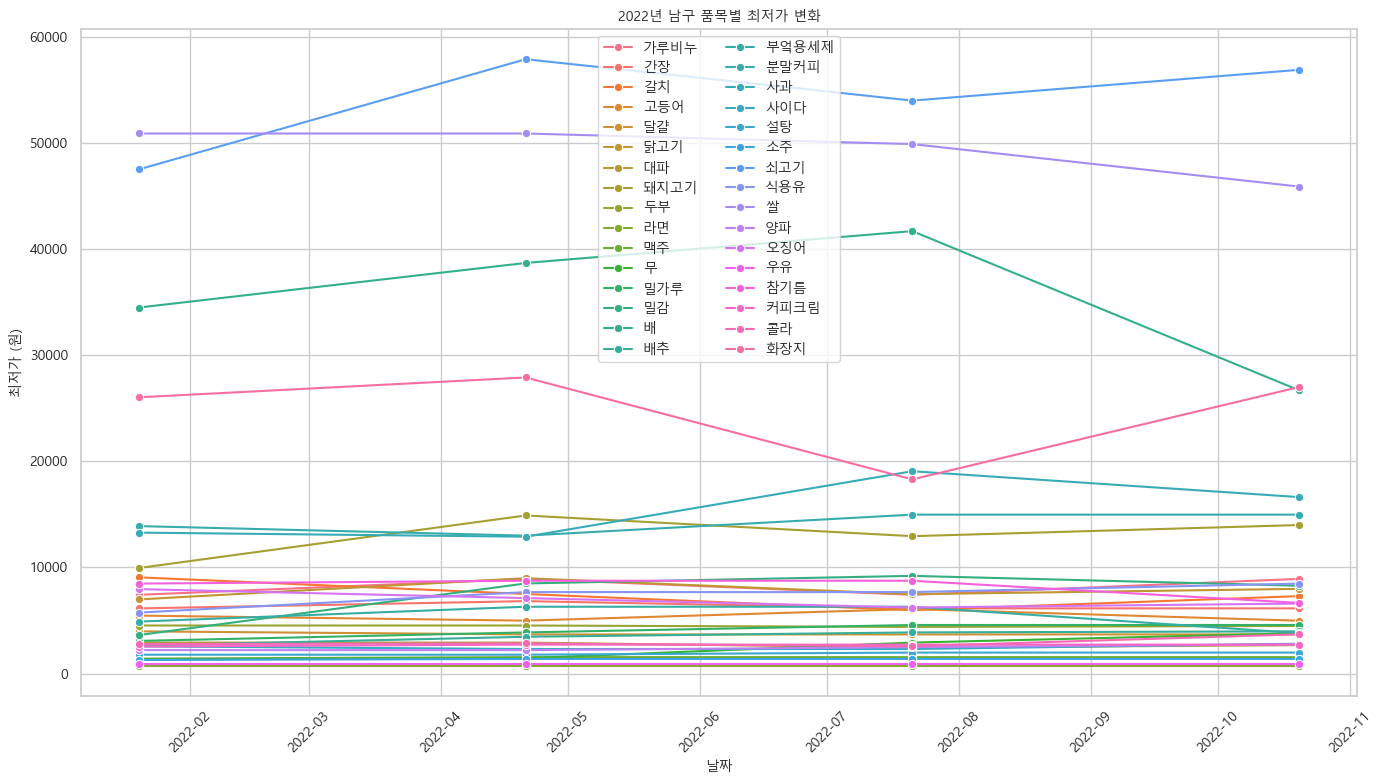

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2022_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2022_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2022_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2022_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2022ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2022_min.csv", index=False, encoding="utf-8-sig")

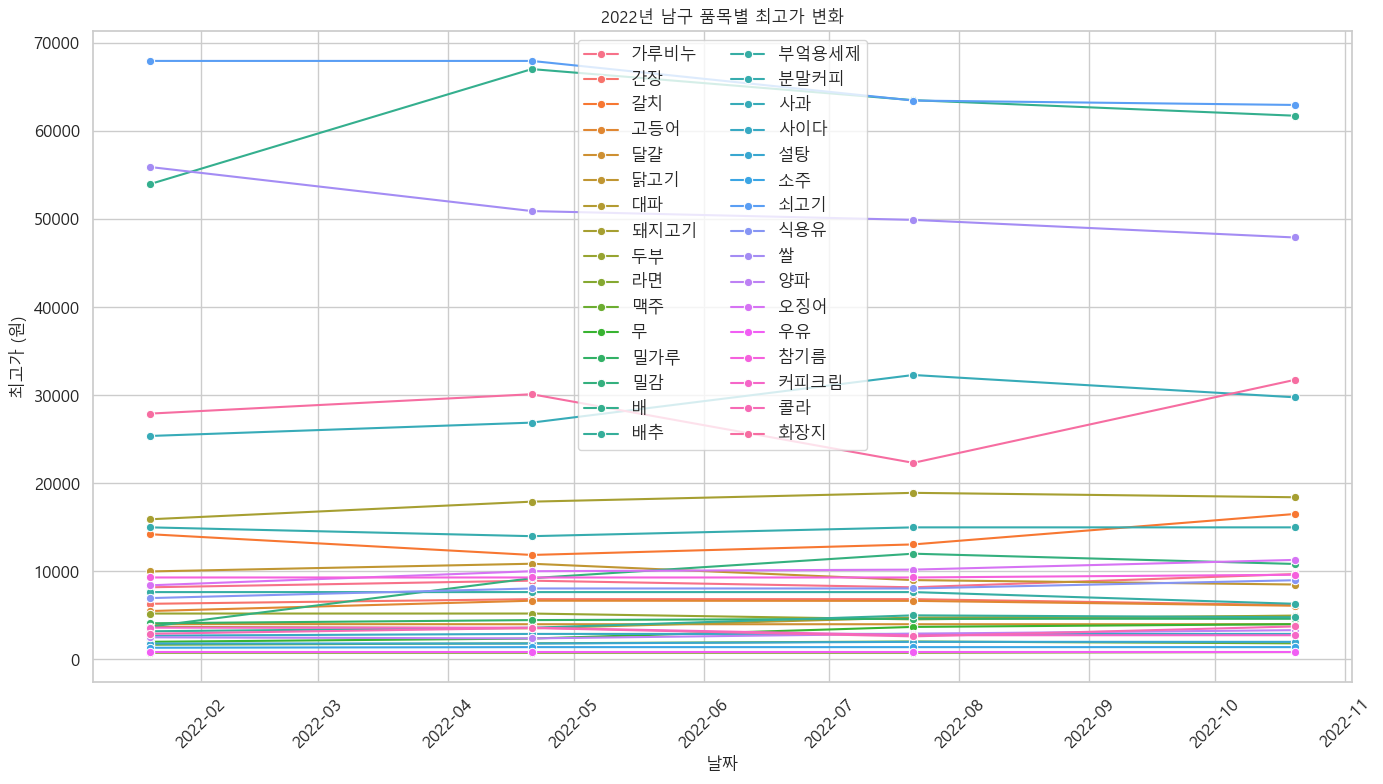

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2022_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2022_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2022_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2022_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2022ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2022_max.csv", index=False, encoding="utf-8-sig")